In [66]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "./img/logoOptimus.png", width=90, height=90)

#### Sistema Avançado de Processamento de Imagens de Satélite com Inteligência Artificial

Equipe:
* Leandro de Oliveira Santos
* Jose Antonio Saraiva Junior
* Ayrthon Henrique Freitas
* Regis Araujo Melo

###### Multirão Tech - Prefeitura de Goiãnia 2019

## Testes com Classificadores: Seleção

In [2]:
import os, sys, csv
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
%matplotlib inline

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.utils.multiclass import unique_labels

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import keras.backend as K

from keras.utils import to_categorical

Using TensorFlow backend.


In [7]:
ds_path = os.path.join('dataset', 'dataset_sentinel-2_20190804_0543.csv')

In [8]:
ds = pd.read_csv(ds_path, delimiter=';', encoding = "ISO-8859-1") 

In [9]:
# Estatísticas descritivas para cada coluna 
ds.describe ()

B1           B2           B3           B4           B5  \
count   166.000000   166.000000   166.000000   166.000000   166.000000   
mean   1299.126506  1154.222892  1160.301205  1431.638554  1515.933735   
std     121.054116   177.537068   228.890776   383.883287   337.117534   
min    1081.000000   763.000000   655.000000   434.000000   675.000000   
25%    1199.000000  1042.250000  1020.000000  1184.750000  1280.750000   
50%    1309.000000  1130.500000  1130.500000  1395.500000  1506.000000   
75%    1356.000000  1242.250000  1266.500000  1638.000000  1670.500000   
max    1734.000000  2243.000000  2302.000000  3179.000000  3461.000000   

                B6           B7           B8          B8A           B9  \
count   166.000000   166.000000   166.000000   166.000000   166.000000   
mean   1919.927711  2139.204819  2102.825301  2296.361446   696.433735   
std     346.961033   387.992464   393.413253   402.830864   175.546433   
min     868.000000   959.000000   840.000000   934.000000   385.000000   
25%    1718.750000  1886.250000  1872.000000  2030.750000   525.500000   
50%    1907.000000  2109.000000  2091.500000  2267.000000   715.000000   
75%    2114.000000  2339.000000  2314.000000  2476.500000   851.500000   
max    3819.000000  3976.000000  3657.000000  3882.000000  1238.000000   

              B10          B11          B12   QA10   QA20   QA60         LON  
count  166.000000   166.000000   166.000000  166.0  166.0  166.0  166.000000  
mean    13.162651  2322.530120  1731.518072    0.0    0.0    0.0  -48.663619  
std      1.759147   420.640474   488.531550    0.0    0.0    0.0    7.650449  
min      9.000000  1129.000000   742.000000    0.0    0.0    0.0  -49.311436  
25%     12.000000  2123.250000  1424.500000    0.0    0.0    0.0  -49.271061  
50%     13.000000  2322.500000  1713.500000    0.0    0.0    0.0  -49.260669  
75%     15.000000  2552.000000  1905.750000    0.0    0.0    0.0  -49.240715  
max     18.000000  4688.000000  4391.000000    0.0    0.0    0.0   49.310974

In [10]:
ds = ds.drop(['Descrição'],axis=1)
ds = ds.drop(['B1'],axis=1)
# ds = ds.drop(['B2'],axis=1)
# ds = ds.drop(['B3'],axis=1)
# ds = ds.drop(['B4'],axis=1)
ds = ds.drop(['B5'],axis=1)
ds = ds.drop(['B6'],axis=1)
ds = ds.drop(['B7'],axis=1)
# ds = ds.drop(['B8'],axis=1)
ds = ds.drop(['B8A'],axis=1)
ds = ds.drop(['B9'],axis=1)
ds = ds.drop(['B10'],axis=1)
ds = ds.drop(['B11'],axis=1)
ds = ds.drop(['B12'],axis=1)
ds = ds.drop(['QA10'],axis=1)
ds = ds.drop(['QA20'],axis=1)
ds = ds.drop(['QA60'],axis=1)
ds = ds.drop(['IMAGE_ID'],axis=1)
ds = ds.drop(['LON'],axis=1)
ds = ds.drop(['LAT'],axis=1)

In [11]:
# Estatísticas descritivas para cada coluna 
ds.describe ()

B2           B3           B4           B8
count   166.000000   166.000000   166.000000   166.000000
mean   1154.222892  1160.301205  1431.638554  2102.825301
std     177.537068   228.890776   383.883287   393.413253
min     763.000000   655.000000   434.000000   840.000000
25%    1042.250000  1020.000000  1184.750000  1872.000000
50%    1130.500000  1130.500000  1395.500000  2091.500000
75%    1242.250000  1266.500000  1638.000000  2314.000000
max    2243.000000  2302.000000  3179.000000  3657.000000

In [12]:
# Transformar tudo que eh TalvezEntulho em NaoEntulho
ds.loc[ds['Classe'] == 'TalvezEntulho', 'Classe'] = 'NaoEntulho'

In [13]:
classes = list(ds['Classe'].unique())
print(classes)

['Entulho', 'NaoEntulho']


In [14]:
ds_class_0 = ds[ds.Classe == classes[0]]
ds_class_1 = ds[ds.Classe == classes[1]]
# ds_class_2 = ds[ds.Classe == classes[2]]

In [15]:
len_ds_class_0 = len(ds_class_0)
len_ds_class_1 = len(ds_class_1)
# len_ds_class_2 = len(ds_class_2)

i_train = 0.8
i_test = 1-i_train

In [16]:
ds_class_0_train = ds_class_0[0:int(i_train*len_ds_class_0)]
ds_class_1_train = ds_class_1[0:int(i_train*len_ds_class_1)]
# ds_class_2_train = ds_class_2[0:int(i_train*len_ds_class_2)]

ds_class_0_test = ds_class_0[int(i_train*len_ds_class_0):len_ds_class_0]
ds_class_1_test = ds_class_1[int(i_train*len_ds_class_1):len_ds_class_1]
# ds_class_2_test = ds_class_2[int(i_train*len_ds_class_2):len_ds_class_2]

In [17]:
# Preparar dados para Algorítimo
# X_train = [ds_class_0_train, ds_class_1_train, ds_class_2_train]
X_train = [ds_class_0_train, ds_class_1_train]
X_train = pd.concat(X_train)
y_train = X_train['Classe']
X_train = X_train.drop(['Classe'],axis=1)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

# X_test = [ds_class_0_test, ds_class_1_test, ds_class_2_test]
X_test = [ds_class_0_test, ds_class_1_test]
X_test = pd.concat(X_test)
y_test = X_test['Classe']
X_test = X_test.drop(['Classe'],axis=1)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

### SVM

#### Não selecionado pois trouxe uma precisão no inferior

In [18]:
classifier = svm.SVC(kernel='linear', C=0.01)
classifier.fit(X_train, y_train)
prediction_SVM = classifier.predict(X_test)

In [19]:
classifier

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
classifier.score(X_test,y_test)

0.6764705882352942

In [21]:
confusion_matrix(y_test, prediction_SVM)

array([[ 0, 11],
       [ 0, 23]], dtype=int64)

### Random forest with scikit-learn

#### Selecionado por ter apresentado melhor precisão

In [27]:
random_forest = RandomForestClassifier(n_estimators=15,)
random_forest.fit(X_train,y_train)
random_forest.score(X_test,y_test)

0.7647058823529411

In [28]:
prediction_RF = random_forest.predict(X_test)

In [29]:
confusion_matrix(y_test, prediction_RF)

array([[ 3,  8],
       [ 0, 23]], dtype=int64)

In [30]:
random_forest.score(X_test,y_test)

0.7647058823529411

In [31]:
merged_list = [(list(prediction_RF)[i], list(X_test)[i]) for i in range(0, len(list(prediction_RF)))] 
# list(prediction_RF) + list(X_test)

In [32]:
merged_list

[('Entulho', array([1290, 1292, 1954, 2286], dtype=int64)),
 ('NaoEntulho', array([1176, 1239, 1641, 2163], dtype=int64)),
 ('Entulho', array([1203, 1175, 1517, 2151], dtype=int64)),
 ('NaoEntulho', array([1070, 1014, 1038, 2157], dtype=int64)),
 ('NaoEntulho', array([1010,  974, 1052, 2429], dtype=int64)),
 ('Entulho', array([1198, 1148, 1322, 1896], dtype=int64)),
 ('NaoEntulho', array([1037, 1018, 1369, 1703], dtype=int64)),
 ('NaoEntulho', array([1004,  968, 1292, 1661], dtype=int64)),
 ('NaoEntulho', array([1006,  977, 1309, 1820], dtype=int64)),
 ('NaoEntulho', array([1083, 1101, 1435, 1766], dtype=int64)),
 ('NaoEntulho', array([1003,  998, 1081, 2196], dtype=int64)),
 ('NaoEntulho', array([1078, 1046, 1712, 1911], dtype=int64)),
 ('NaoEntulho', array([1100, 1086, 1546, 1808], dtype=int64)),
 ('NaoEntulho', array([1121, 1191, 1924, 2118], dtype=int64)),
 ('NaoEntulho', array([1028, 1073, 1667, 2145], dtype=int64)),
 ('NaoEntulho', array([ 993, 1026, 1430, 2157], dtype=int64)),
 

precisão, matriz de confusão, recuperação de precisão e valores de F1

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
print(classification_report(y_test,prediction_RF))

              precision    recall  f1-score   support

     Entulho       1.00      0.27      0.43        11
  NaoEntulho       0.74      1.00      0.85        23

    accuracy                           0.76        34
   macro avg       0.87      0.64      0.64        34
weighted avg       0.83      0.76      0.71        34



In [35]:
print(accuracy_score(y_test, prediction_RF))

0.7647058823529411


In [36]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [37]:
# Extract the small tree
tree_small = random_forest.estimators_[5]

In [38]:
# Saving feature names for later use
feature_list = list(ds.columns)

In [39]:
feature_list.remove("Classe")

In [40]:
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

In [41]:
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

In [42]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [43]:
graph.write_png('small_tree.png');

In [44]:
from IPython.display import Image
Image(filename='small_tree.png') 

In [45]:
# Get numerical feature importances
importances = list(random_forest.feature_importances_)

In [46]:
feature = ds.drop(['Classe'],axis=1)

In [47]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

In [48]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [49]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: B3                   Importance: 0.31
Variable: B8                   Importance: 0.25
Variable: B2                   Importance: 0.23
Variable: B4                   Importance: 0.21


In [50]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Salvar modelo, com respectivo peso para ser utilizado em Predição para produção

In [52]:
import joblib

In [53]:
filename = 'finalized_model.sav'
joblib.dump(random_forest, filename)

['finalized_model.sav']

In [54]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test,y_test)
print(result)

0.7647058823529411


In [48]:
# Atribui os valores das bandas para um array para ser utilizado na Predição.
#to_predict = np.asarray([[1290, 1292, 1954, 2286]])

In [49]:
# Calcula a probabilidade de cada classe.
#pred = loaded_model.predict_proba(to_predict)

In [50]:
# Imprime a probabilidade de de cada classe.
#pred

array([[1., 0.]])

### Neural Network

In [51]:
def to_cat(y):
    df = pd.DataFrame(y_train, columns=['classe'])
    category_columns = list(df.select_dtypes(['category']).columns)
    df[category_columns] = df[category_columns].apply(lambda x: x.cat.codes)
    df['classe'] = df['classe'].astype('category').cat.codes
    return list(df['classe'])

In [52]:
len_input_shape = X_train.shape[1]

In [53]:
epochs = 150

In [54]:
def model():
    global network_history
    model = Sequential()
    model.add(Dense(64,input_shape=(len_input_shape,)))
    model.add(Dropout(0.2))
    model.add(Dense(64, kernel_initializer='normal'))
    model.add(Dense(1, activation='sigmoid'))
    
    ## mean_squared_error
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001), metrics=['accuracy'])    
    network_history = model.fit(X_train, to_cat(y_train), batch_size=32, epochs=epochs, validation_split=0.3,verbose=1)
    
    ## mean_squared_error
    # model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])    
    # network_history = model.fit(X_train, to_cat(y_train), batch_size=32, epochs=60, validation_split=0.3,verbose=1)
    
    
    
    return model

In [55]:
model = model()

Train on 92 samples, validate on 40 samples
Epoch 1/150
92/92 [==============================] - 1s 11ms/step - loss: 0.4239 - acc: 0.5761 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/150
92/92 [==============================] - 0s 148us/step - loss: 0.5109 - acc: 0.4891 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/150
92/92 [==============================] - 0s 137us/step - loss: 0.5652 - acc: 0.4348 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/150
92/92 [==============================] - 0s 143us/step - loss: 0.5490 - acc: 0.4457 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/150
92/92 [==============================] - 0s 149us/step - loss: 0.4841 - acc: 0.5109 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/150
92/92 [==============================] - 0s 129us/step - loss: 0.4565 - acc: 0.5435 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/150
92/92 [==============================] - 0s 140us/step - loss: 0.5061 - acc: 0.4891 - val_loss: 0.0000e+00 - val_acc: 1.000

92/92 [==============================] - 0s 134us/step - loss: 0.4783 - acc: 0.5217 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 120/150
92/92 [==============================] - 0s 131us/step - loss: 0.4783 - acc: 0.5217 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 121/150
92/92 [==============================] - 0s 159us/step - loss: 0.4783 - acc: 0.5217 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 122/150
92/92 [==============================] - 0s 141us/step - loss: 0.4783 - acc: 0.5217 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 123/150
92/92 [==============================] - 0s 120us/step - loss: 0.4783 - acc: 0.5217 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 124/150
92/92 [==============================] - 0s 118us/step - loss: 0.4783 - acc: 0.5217 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 125/150
92/92 [==============================] - 0s 121us/step - loss: 0.4783 - acc: 0.5217 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 126/150
92/92 [====================

In [56]:
print(network_history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


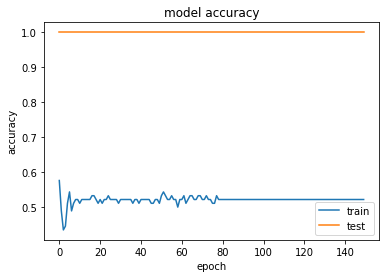

In [57]:
# summarize history for accuracy
plt.plot(network_history.history['acc'])
plt.plot(network_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [58]:
# summarize history for loss
plt.plot(network_history.history['loss'])
plt.plot(network_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()